In [1]:
# prompt: get mnist data from web and put into data folder

import numpy as np
import os
import tensorflow as tf

# Create the data directory if it doesn't exist
data_dir = os.path.join(os.getcwd(), 'data')
if not os.path.exists(data_dir):
  os.makedirs(data_dir)

# Download and extract the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Save the training and test data to the data directory
np.save(os.path.join(data_dir, 'x_train.npy'), x_train)
np.save(os.path.join(data_dir, 'y_train.npy'), y_train)
np.save(os.path.join(data_dir, 'x_test.npy'), x_test)
np.save(os.path.join(data_dir, 'y_test.npy'), y_test)


11490434/11490434 [==============================] - 0s 0us/step


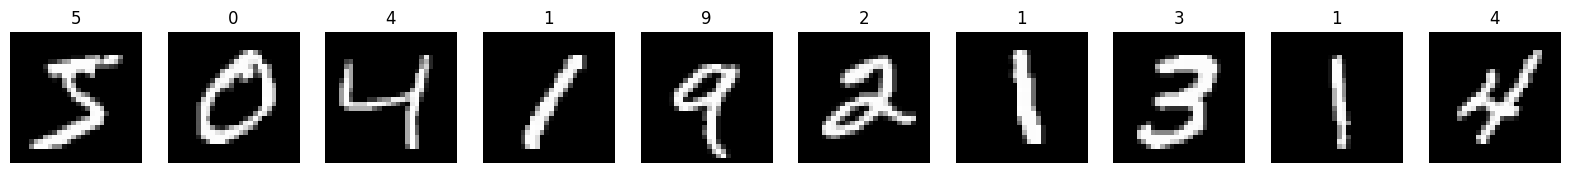

In [2]:
# prompt: load npy files and visualize in one row

import matplotlib.pyplot as plt
import numpy as np

# Load the data from the data directory
x_train = np.load(os.path.join(data_dir, 'x_train.npy'))
y_train = np.load(os.path.join(data_dir, 'y_train.npy'))
x_test = np.load(os.path.join(data_dir, 'x_test.npy'))
y_test = np.load(os.path.join(data_dir, 'y_test.npy'))

# Plot the first n images in a row
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
  plt.subplot(1, n, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(y_train[i])
  plt.axis('off')
plt.show()


In [3]:
import cv2
def add_occlusion(image):
    x, y = np.random.randint(0, image.shape[0] - 10, 2)
    image[x:x+10, y:y+10] = 0
    return image

def add_scratch(image):
    scratch_length = np.random.randint(5, 10)
    scratch_thickness = np.random.randint(1, 2)
    start_x = np.random.randint(0, image.shape[0])
    start_y = np.random.randint(0, image.shape[1])
    end_x = (start_x + scratch_length) % image.shape[0]
    end_y = (start_y + scratch_length) % image.shape[1]
    cv2.line(image, (start_x, start_y), (end_x, end_y), (224,), scratch_thickness)
    return image

60000


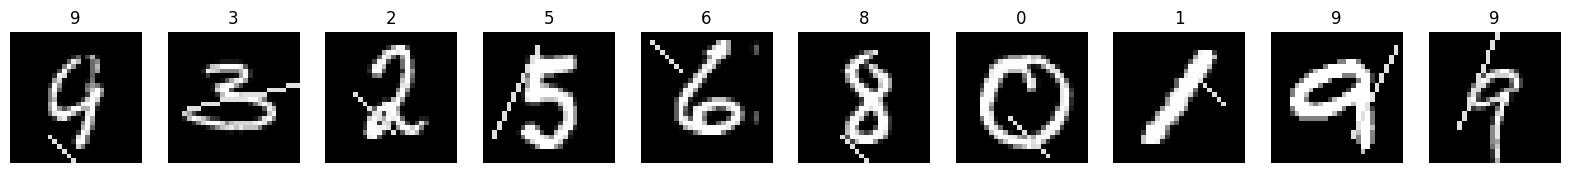

In [4]:
train_data = x_train.copy()
print(len(train_data))
num_augmentations = 1000
indices = np.random.choice(train_data.shape[0], num_augmentations, replace=False)

plt.figure(figsize=(20, 2))

cnt = 1
for i in indices:
    train_data[i] = add_scratch(train_data[i])
    plt.subplot(1, 10, cnt)
    cnt = cnt + 1
    plt.imshow(train_data[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
    if cnt>10:
      break
plt.show()

In [5]:
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
# from tensorflow.keras.models import Model
# from tensorflow.keras.datasets import mnist

# # Load MNIST data
# (x_train, _), (x_test, _) = mnist.load_data()

# # Normalize the data
# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.
# x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
# x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# # Define the input layer
# input_img = Input(shape=(28, 28, 1))

# # Define the encoding layers
# x = Flatten()(input_img)
# x = Dense(128, activation='relu')(x)
# x = Dense(64, activation='relu')(x)
# x = Dense(64, activation='relu')(x)
# encoded = Dense(32, activation='relu')(x)

# # Define the decoding layers
# x = Dense(64, activation='relu')(encoded)
# x = Dense(64, activation='relu')(x)
# x = Dense(128, activation='relu')(x)
# x = Dense(28 * 28, activation='sigmoid')(x)
# decoded = Reshape((28, 28, 1))(x)

# # Define the autoencoder model
# autoencoder = Model(input_img, decoded)

# # Compile the autoencoder model
# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# # Train the autoencoder model
# autoencoder.fit(x_train, x_train,
#                 epochs=200,
#                 batch_size=256,
#                 shuffle=True,
#                 validation_data=(x_test, x_test))

# # Encode and decode some digits
# encoded_digits = autoencoder.predict(x_test)

# # Plot the original and decoded digits
# n = 10
# plt.figure(figsize=(20, 4))
# for i in range(n):
#     # Display original image
#     ax = plt.subplot(2, n, i + 1)
#     plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)

#     # Display decoded image
#     ax = plt.subplot(2, n, i + 1 + n)
#     plt.imshow(encoded_digits[i].reshape(28, 28), cmap='gray')
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)

# plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist

# Load MNIST data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Define the input layer
input_img = Input(shape=(28, 28, 1))

# Define the encoding layers
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Define the decoding layers
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the autoencoder model
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test),
                          callbacks=[early_stopping])



Epoch 1/50
235/235 [==============================] - 13s 18ms/step - loss: 0.1733 - val_loss: 0.0873
Epoch 2/50
141/235 [=================>............] - ETA: 1s - loss: 0.0848

KeyboardInterrupt: 

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST data
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

# Define the autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2, padding=0),  # No padding
            nn.Conv2d(32, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2, padding=0)  # No padding
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.Conv2d(32, 1, kernel_size=3, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Initialize the model, loss function and optimizer
autoencoder = Autoencoder()
criterion = nn.BCELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Train the autoencoder
num_epochs = 20
early_stopping_patience = 3
best_val_loss = float('inf')
patience_counter = 0

for epoch in range(num_epochs):
    autoencoder.train()
    train_loss = 0
    for data in train_loader:
        inputs, _ = data
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(train_loader.dataset)

    autoencoder.eval()
    val_loss = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, _ = data
            outputs = autoencoder(inputs)
            loss = criterion(outputs, inputs)
            val_loss += loss.item() * inputs.size(0)

    val_loss /= len(test_loader.dataset)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(autoencoder.state_dict(), 'best_autoencoder.pth')
    else:
        patience_counter += 1

    if patience_counter >= early_stopping_patience:
        print("Early stopping triggered")
        break

# Load the best model
autoencoder.load_state_dict(torch.load('best_autoencoder.pth'))

# Plot some of the reconstructed images


Epoch [1/20], Train Loss: 0.1837, Validation Loss: 0.0882
Epoch [2/20], Train Loss: 0.0846, Validation Loss: 0.0804
Epoch [3/20], Train Loss: 0.0796, Validation Loss: 0.0771
Epoch [4/20], Train Loss: 0.0770, Validation Loss: 0.0750


KeyboardInterrupt: 

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Load MNIST data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

# Define the Encoder
class Encoder(nn.Module):
    def __init__(self, img_shape, code_size):
        super(Encoder, self).__init__()
        self.conv1 = nn.Conv2d(img_shape[0], 64, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(256 * 3 * 3, code_size)

    def forward(self, x):
        x = self.pool1(self.conv1(x))
        x = self.pool2(self.conv2(x))
        x = self.pool3(self.conv3(x))
        x = self.flatten(x)
        x = self.fc(x)
        return x

class Decoder(nn.Module):
    def __init__(self, code_size):
        super(Decoder, self).__init__()
        self.fc = nn.Linear(code_size, 256 * 3 * 3)
        # Adjust parameters to correctly upsample to 28x28
        self.deconv1 = nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2)
        self.deconv2 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2, padding=1)
        self.deconv3 = nn.ConvTranspose2d(64, 1, kernel_size=2, stride=2, padding=1)

    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 256, 3, 3)
        x = self.deconv1(x)
        x = self.deconv2(x)
        x = self.deconv3(x)
        return torch.sigmoid(x)

# Define the Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, img_shape, code_size):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder(img_shape, code_size)
        self.decoder = Decoder(code_size)

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Hyperparameters
img_shape = (1, 28, 28)
code_size = 64
learning_rate = 0.001
num_epochs = 10

# Initialize model, loss function, and optimizer
model = Autoencoder(img_shape, code_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for data in trainloader:
        inputs, _ = data
        outputs = model(inputs)
        print(outputs.size())
        loss = criterion(outputs, inputs)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Save the model
torch.save(model.state_dict(), 'autoencoder.pth')


torch.Size([64, 1, 22, 22])


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64, 1, 28, 28])) that is different to the input size (torch.Size([64, 1, 22, 22])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (22) must match the size of tensor b (28) at non-singleton dimension 3

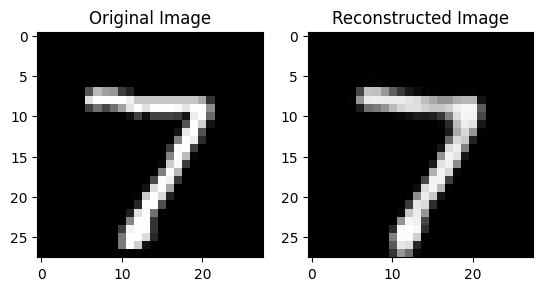

In [8]:
autoencoder.eval()
with torch.no_grad():
    data_iter = iter(test_loader)
    inputs, _ = next(data_iter)
    outputs = autoencoder(inputs)

    inputs = inputs.numpy()
    outputs = outputs.numpy()

    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(inputs[0].reshape(28, 28), cmap='gray')
    axes[0].set_title('Original Image')
    axes[1].imshow(outputs[0].reshape(28, 28), cmap='gray')
    axes[1].set_title('Reconstructed Image')
    plt.show()


In [ ]:
# Encode and decode some digits
decoded_digits = autoencoder.predict(x_test)

# Plot the original and decoded digits
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display decoded image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_digits[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [ ]:
# prompt: select indices and make an nd array, indices is list and use current ndarray for selection

# indices = [3, 4, 5]
train_data = train_data[indices]
